<a href="https://colab.research.google.com/github/defyMiy/nothing/blob/main/plotgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
# clean data
import csv

with open('data.txt', 'r', encoding='utf-8') as data_txt:
  data_all = data_txt.readlines()
data_txt.close()
with open('data.csv', 'w', encoding='utf-8') as data_csv:
  writer = csv.writer(data_csv)
  writer.writerow(['date', 'time', 'weight'])
  for i, info in enumerate(data_all):
    info = info.replace(' ', '').replace('|', ',').replace('Date:', '').replace('weight:', '').replace('g', '').replace('\n', '')
    data = info.split(',')
    if data[0].find('/') > 2:
      data[0] = data[0].replace('30', '')
    if '' in data:
      continue
    if '-' in data[2]:
      continue
    writer.writerow([data[0], data[1], data[2]])
data_csv.close()

In [147]:
# seperate data
import pandas as pd

date_all = []
data = pd.read_csv('data.csv')
start = 0
date = data['date'][start]
date_all.append((start, date))
for i in range(len(data)):
  if date != data['date'][i]:
    start = i
    date = data['date'][start]
    date_all.append((i, date))
print(date_all)

[(0, '21/7/20'), (167, '21/7/21'), (450, '21/7/22')]


In [152]:
date_all[1][0]

167

(0.0, 0.7)

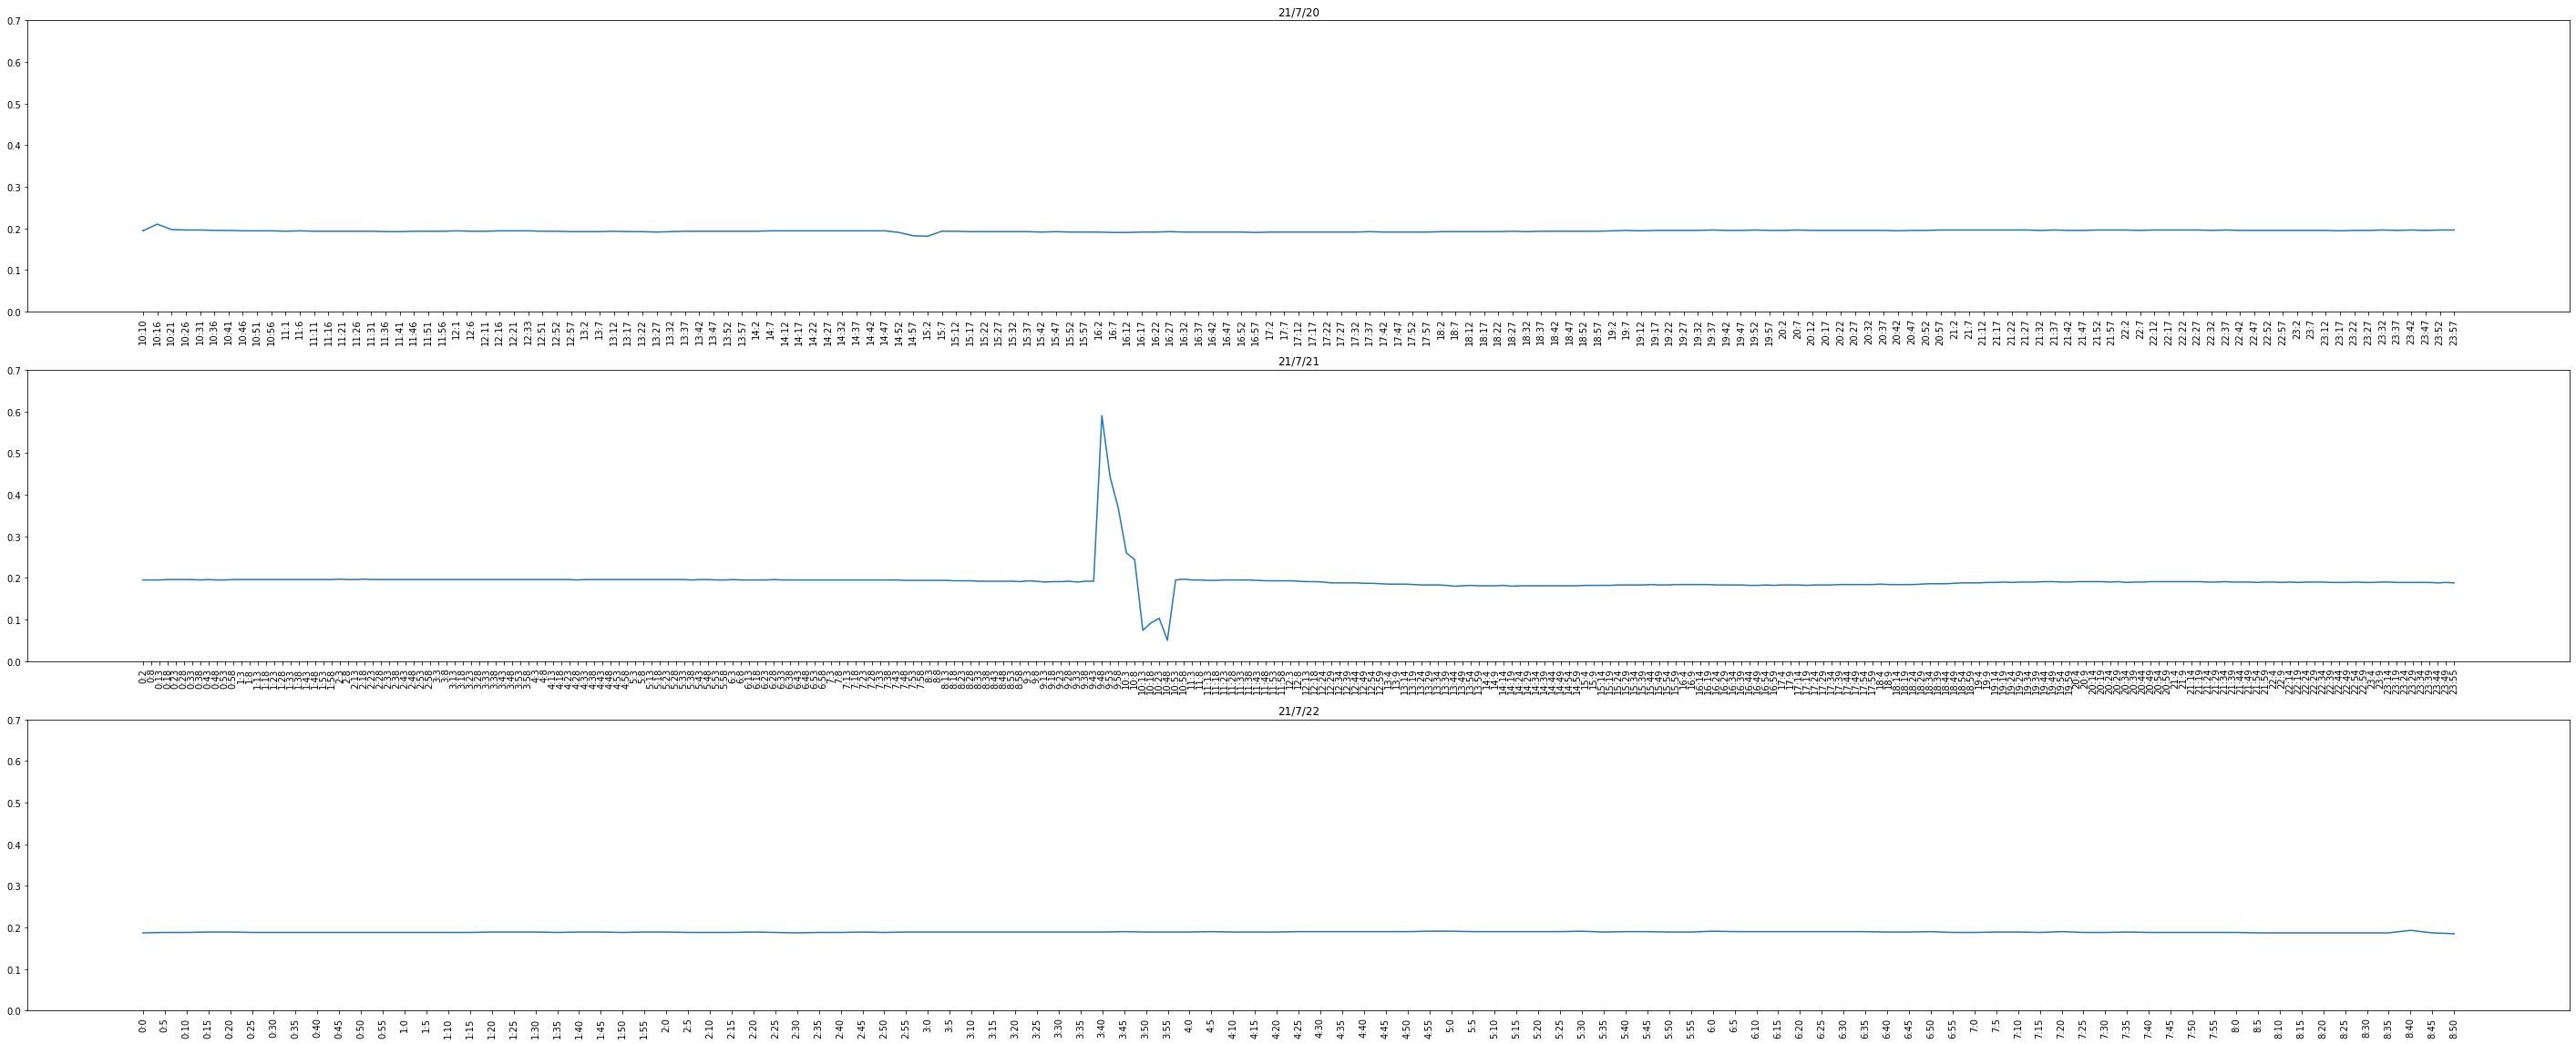

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_figheight(20)
fig.set_figwidth(50)
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)
ax3.tick_params(axis='x', rotation=90)
df = pd.DataFrame(data)
ax1.title.set_text(date_all[0][1])
ax2.title.set_text(date_all[1][1])
ax3.title.set_text(date_all[2][1])
ax1.plot(list(df.iloc[date_all[0][0]:date_all[1][0], 1]), list(df.iloc[date_all[0][0]:date_all[1][0], 2]))
ax2.plot(list(df.iloc[date_all[1][0]:date_all[2][0], 1]), list(df.iloc[date_all[1][0]:date_all[2][0], 2]))
ax3.plot(list(df.iloc[date_all[2][0]:, 1]), list(df.iloc[date_all[2][0]:, 2]))
ax1.set_ylim([0, 0.7])
ax2.set_ylim([0, 0.7])
ax3.set_ylim([0, 0.7])